<a href="https://colab.research.google.com/github/labadilloj/TLG-DS-2025/blob/main/DS_C3SC1_LeslieBadillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto: Explorando el Índice de Felicidad



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap
import seaborn as sns

2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [ ]:
from google.colab import files
uploaded = files.upload()  # seleccionar archivo .csv

Saving Happiness_report.csv to Happiness_report.csv


In [ ]:
hapiness = pd.read_csv("Happiness_report.csv")
print(hapiness.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country o region quede como índice.

In [ ]:
mexico = hapiness.set_index('Country or region').loc[['Mexico']].copy()
print(mexico.head())

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  



4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

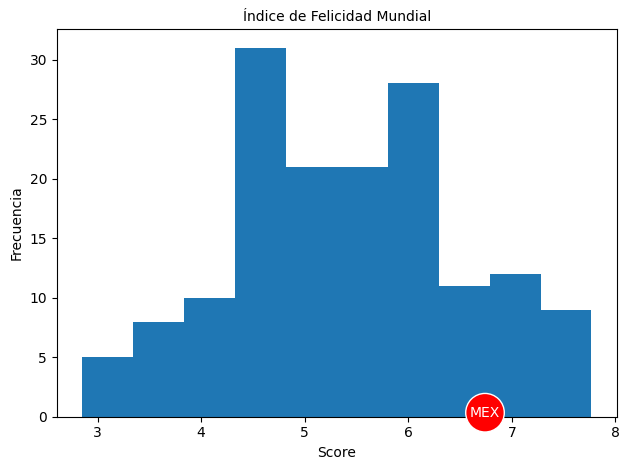

In [ ]:
ax = hapiness['Score'].plot.hist(bins=10)

mex = float(mexico['Score'].iloc[0])     # valor de México

trans = ax.get_xaxis_transform()
ax.text(float(mexico['Score'].iloc[0]), 0.0, "MEX",
        transform=trans,
        bbox=dict(boxstyle="circle", fc="red", ec="white"),
        color="white", clip_on=False)

ax.set_xlabel("Score"); ax.set_ylabel("Frecuencia")
ax.set_title(f"Índice de Felicidad Mundial", fontsize=10)

plt.tight_layout(); plt.show()

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación. :

/tmp/ipython-input-1591395753.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(hapiness['Healthy life expectancy'].dropna(), labels=['Healthy life expectancy'])


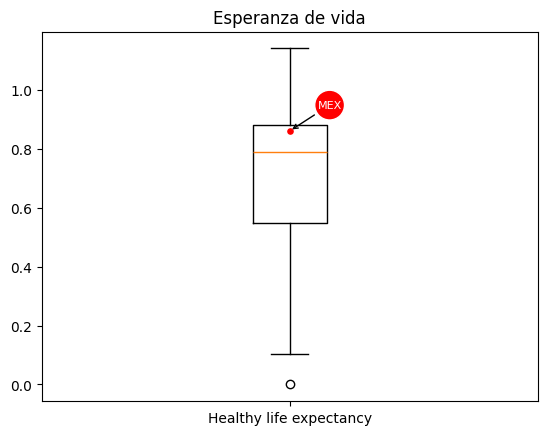

In [ ]:
plt.boxplot(hapiness['Healthy life expectancy'].dropna(), labels=['Healthy life expectancy'])
mex_val = float(mexico['Healthy life expectancy'].iloc[0])

ax = plt.gca()
ax.scatter(1, mex_val, color="red",
           edgecolors="white", linewidths=1.2)

ax.annotate("MEX", xy=(1, mex_val), xytext=(20, 15), textcoords="offset points",
             va="bottom", fontsize=8, color="white",
            bbox=dict(boxstyle="circle,pad=0.25", fc="red", ec="white"),
            arrowprops=dict(arrowstyle="->", color="black"))
plt.title('Esperanza de vida')
plt.show()

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

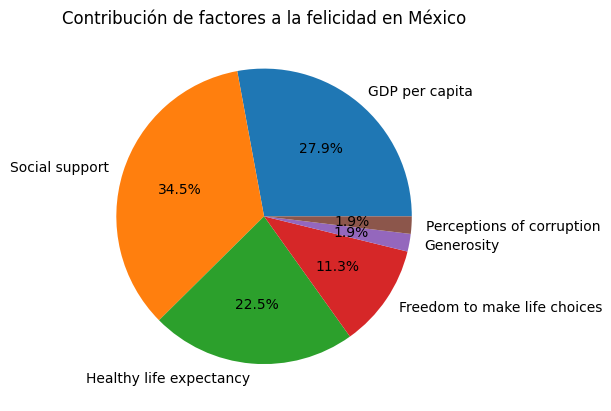

In [ ]:
variables = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

factores = [c for c in variables if c in mexico.columns]

mex_factors = (pd.to_numeric(mexico[factores].iloc[0], errors="coerce")
                 .dropna()
                 .rename_axis("Factor")
                 .reset_index(name="Valor"))

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.pie(
    mex_factors["Valor"],
    labels=mex_factors["Factor"],
    autopct=lambda p: f"{p:.1f}%",
    counterclock=True,
)
ax.set_title("Contribución de factores a la felicidad en México")
plt.show()

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

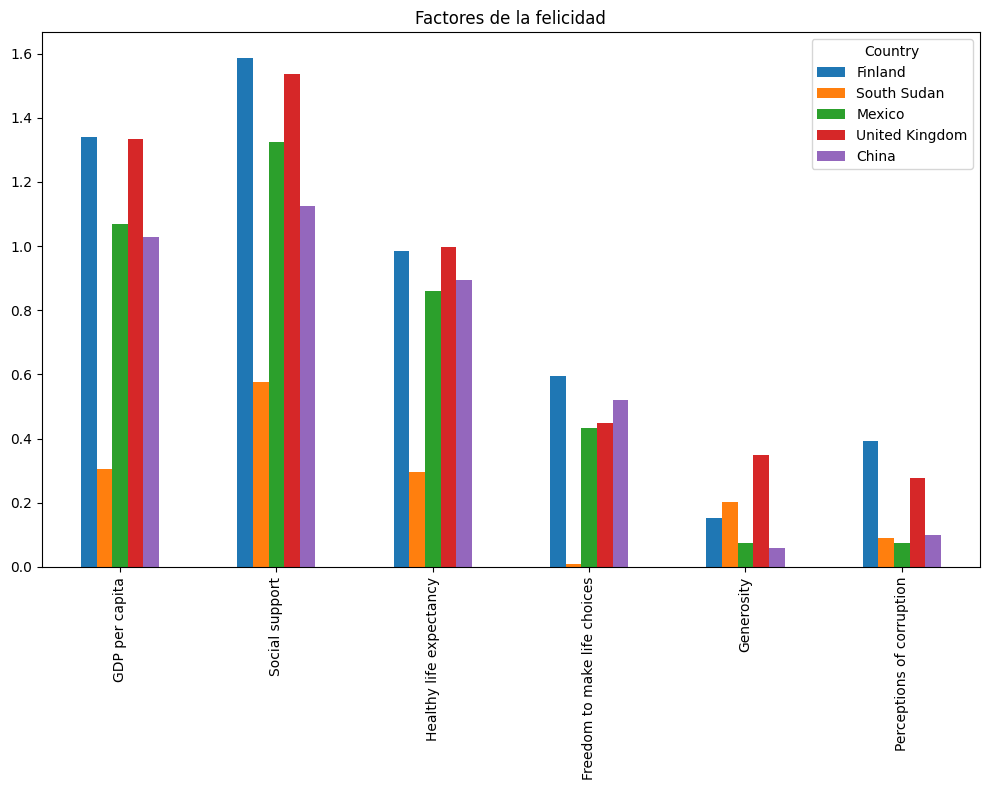

In [ ]:
factores = [c for c in variables if c in hapiness.columns]

happiest = hapiness.loc[hapiness['Score'].idxmax(), 'Country or region']
least    = hapiness.loc[hapiness['Score'].idxmin(), 'Country or region']
mex      = "Mexico"

extras = ["United Kingdom", "China"]
extras = [c for c in extras if c in hapiness['Country or region'].values and c not in {happiest, least, mex}]
valores = [happiest, least, mex] + extras[:2]

sub = (hapiness.set_index('Country or region').loc[valores, factores])
sub = sub.T

ax = sub.plot(kind="bar", figsize=(10, 8))
ax.set_title("Factores de la felicidad")
ax.legend(title="Country")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

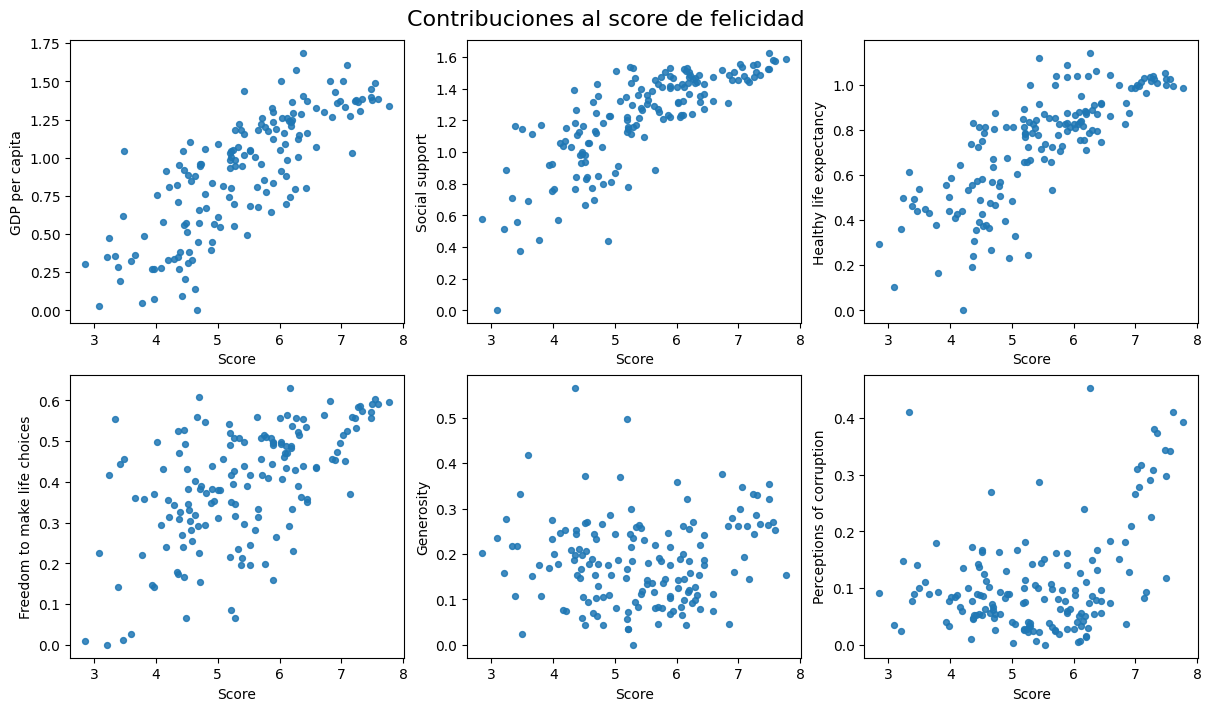

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), constrained_layout=True)
axes = axes.ravel()

cors = {}
for ax, fac in zip(axes, factores):
    dfp = hapiness[['Score', 'Country or region', fac]].copy()
    dfp['Score'] = pd.to_numeric(dfp['Score'])
    dfp[fac]       = pd.to_numeric(dfp[fac])
    dfp = dfp.dropna(subset=['Score', fac])

    ax.scatter(dfp['Score'], dfp[fac], s=18, alpha=0.85)

    fig.suptitle("Contribuciones al score de felicidad", fontsize=16)
    ax.set_xlabel("Score")
    ax.set_ylabel(fac)

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

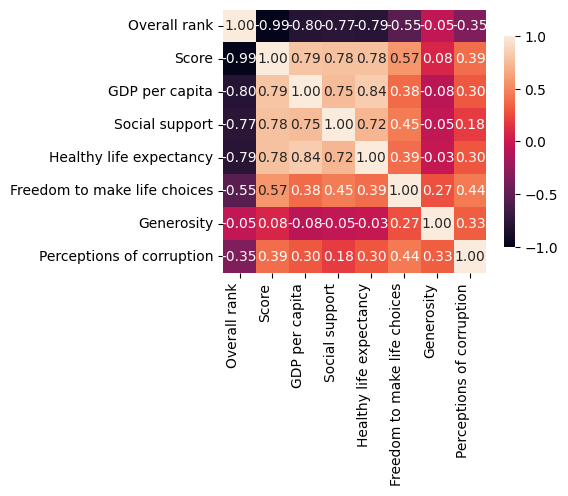

In [ ]:
cols = ['Score'] + factores
if 'Overall rank' in hapiness.columns:
    cols = ['Overall rank'] + cols

df = hapiness[cols].apply(pd.to_numeric, errors='coerce')
corr = df.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1,
            square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=90, ha="right"); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()

10.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [ ]:
from google.colab import files
uploaded = files.upload()  # seleccionar archivo .csv
meta = pd.read_csv("Metadata.csv")
print(meta.head())

Saving Metadata.csv to Metadata.csv
  Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

     TableName  
0        Aruba  
1  Afghanistan  
2       Angola  
3      Albania  
4      Andorra  


/tmp/ipython-input-3425267363.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("Set2")


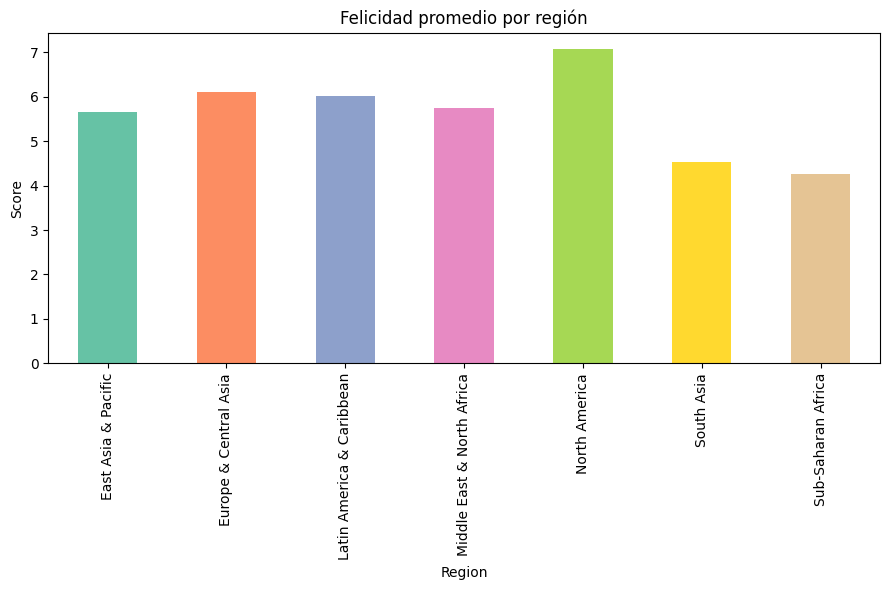

In [ ]:
meta2 = (meta.rename(columns={"TableName": "Country or region"})
            [["Country or region", "Region", "IncomeGroup"]]
            .dropna(subset=["Country or region"]))

# 2) Unir con tu base principal
df = (hapiness[["Country or region", "Score"]].copy())
df["Country or region"] = df["Country or region"].str.strip()
meta2["Country or region"] = meta2["Country or region"].str.strip()

df = df.merge(meta2, on="Country or region", how="left")
df["Score"] = pd.to_numeric(df["Score"])

avg = (df.dropna(subset=["Region","Score"])
         .groupby("Region", as_index=False)["Score"]
         .mean())

ax = avg.plot(kind="bar", x="Region", y="Score", figsize=(9,6), legend=False)
cmap = get_cmap("Set2")
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(cmap(i / len(ax.patches)))
ax.set_title("Felicidad promedio por región")
ax.set_xlabel("Region"); ax.set_ylabel("Score")
plt.xticks(rotation=90)
plt.tight_layout(); plt.show()